In [1]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-11-13 06:03:04--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-11-13 06:03:04--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-11-13 06:03:04--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [2]:
import numpy as np
import matplotlib.pyplot as plt


trainX = mat['trainX'] #### train on this 
trainY = np.squeeze(mat['trainY'])

testX = mat['testX'] ### only evaluate on this 
testY = np.squeeze(mat['testY'])

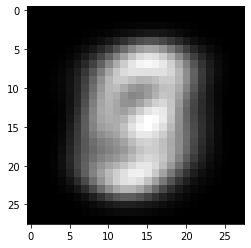

In [3]:
avgDigit = np.mean(trainX, axis=0)
zeromeanDigits = trainX - avgDigit

plt.imshow(np.reshape(avgDigit, (28, 28)), cmap='gray')

In [4]:
covmat = zeromeanDigits.T.dot(zeromeanDigits) / (zeromeanDigits.shape[0] - 1)


In [5]:

eigenvals, eigenvecs = np.linalg.eig(covmat)
eigpairs = [ (eigenvals[i], eigenvecs[: , i] ) for i in range( len(eigenvals) ) ]
eigpairs.sort(key=lambda x : x[0] , reverse = True )


In [6]:
subspace = np.array([eigpairs[i][1] for i in range(28*28)]).T

In [12]:
projections.shape

(10000, 3)

(-1500.0, 1600.0)

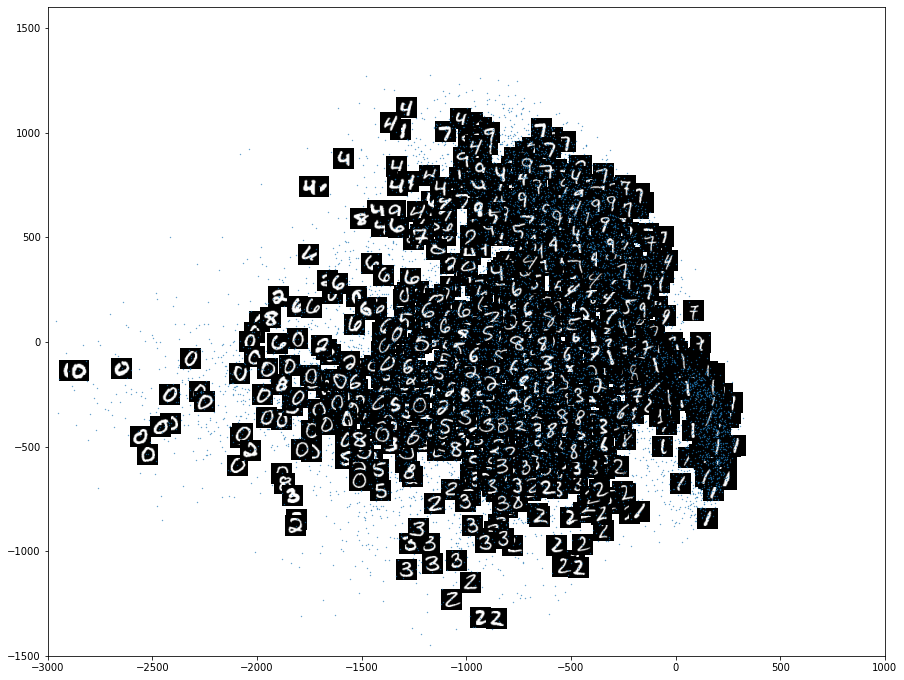

In [ ]:
# perform projections 

digits = testX[:, :]

projections = np.real(digits.dot(subspace[:, :3]))


#digit_nr = 0
size = 50


plt.figure(figsize=(15, 15))
plt.scatter(projections[:, 0], projections[:, 1], s=0.1)
for digit_nr in range(1000):
  plt.imshow(np.reshape(testX[digit_nr, :], (28, 28)), extent = [projections[digit_nr, 0] - size, projections[digit_nr, 0] + size, projections[digit_nr, 1] - size, projections[digit_nr, 1] + size], cmap='gray')

plt.xlim([-3000,  1000])
plt.ylim([-1500,  1600])


In [14]:
testX.shape

(10000, 784)